# Introduction

We use a dataset published in Kaggle by user Sajid Saifi and called 'Prostate Cancer'. The data set consists of 100 observations and 10 variables (out of which 8 numeric variables and one categorical variable and is ID). 

Prostate cancer begins when cells in the prostate gland start to grow out of control. The prostate is a gland found only in males. It makes some of the fluid that is part of semen. The chances of developing prostate cancer increase as you get older. We can look at the occurrence of cancer more deeply and determine its presence by cell in this project.

All observations desctribe zone of tumuor in numeric order. The result is a binary system - what is the type of tumour, benign or malignant.

We have ten features for each cell nucleus:
* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter^2 / area - 1.0)
* symmetry 
* fractal dimension ("coastline approximation" - 1)

Our purpose is use machine learning algorithms and create the best model with low deviation for next binary predictions. 

Lets import useful libraries and download the dataset.

In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [338]:
#import dataset

cancer = pd.read_csv('Prostate_Cancer.csv')
cancer.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [339]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


As we can see dataset haven't null values.

## Preparing the data

It is necessary to select features for creating a model by removing unnecessary columns from the dataset. It is also necessary to check the distribution of data in the columns for outliers.

In [340]:
# drop the ID column cause it's not required.

cancer.drop('id', axis=1, inplace=True)

In [341]:
# turn the object form target column into integer (B - Benign - 0, M - Malignant - 1)

cancer['diagnosis_result'] = cancer.diagnosis_result.apply(lambda x: 0 if x =='B' else 1)
cancer.diagnosis_result.value_counts()

1    62
0    38
Name: diagnosis_result, dtype: int64

C:\Users\810874\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


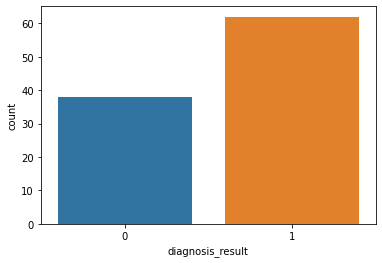

In [342]:
sns.countplot(cancer['diagnosis_result'])
plt.show()

Find the correlation, create the heatmap for best visualization.

<AxesSubplot:>

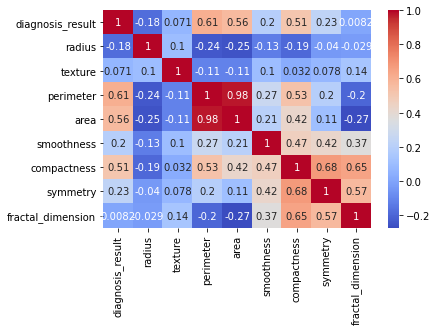

In [343]:
sns.heatmap(cancer.corr(), annot=True, cmap= 'coolwarm')

* strong correlation is red
* weak correlation is blue

***perimeter*** and ***area*** columns have strong correlation. Drop one of them. In example, ***perimeter***.

In [344]:
cancer.drop('perimeter', axis=1, inplace=True)

drop ***texture*** because that column have a weak correlation with other features.

In [345]:
cancer.drop('texture', axis=1, inplace=True)

In [346]:
cancer.describe()

,diagnosis_result,radius,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.620000,16.850000,702.880000,0.102730,0.126700,0.193170,0.064690
std,0.487832,4.879094,319.710895,0.014642,0.061144,0.030785,0.008151
min,0.000000,9.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,0.000000,12.000000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,1.000000,17.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,1.000000,21.000000,917.000000,0.112000,0.157000,0.209000,0.069000
max,1.000000,25.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


### Normalization/vizualization

In [347]:
# normalization
cancer_copy = cancer.copy()
cancer_norm = (cancer_copy - cancer_copy.mean()) / (cancer_copy.std())
cancer_norm.drop('diagnosis_result', axis=1, inplace=True)
cancer_norm['diagnosis_result'] = cancer.diagnosis_result
cancer_norm

,radius,area,smoothness,compactness,symmetry,fractal_dimension,diagnosis_result
0,1.260480,0.785460,2.750354,2.474504,1.586160,1.755620,1
1,-1.608905,1.949011,2.750354,-0.780131,-0.395322,-0.943446,0
2,0.850568,1.564288,1.520993,0.544620,0.449244,-0.575392,1
3,-0.584125,-0.991145,-2.235388,2.572634,2.170860,3.963946,1
4,-1.608905,1.858304,2.613758,0.103036,-0.395322,-0.698077,1
...,...,...,...,...,...,...,...
95,1.260480,1.755086,-0.801134,0.070326,0.546694,-1.066131,1
96,1.055524,-0.787837,0.155036,-0.910971,-0.102972,0.160717,0
97,0.440656,-1.275778,-0.049857,-1.205360,-1.889555,0.528772,0
98,0.850568,-0.906694,-0.869431,-0.845551,-1.012505,0.160717,0


Next we create two plots which can describe distibutions of features and dependence of the diagnosis

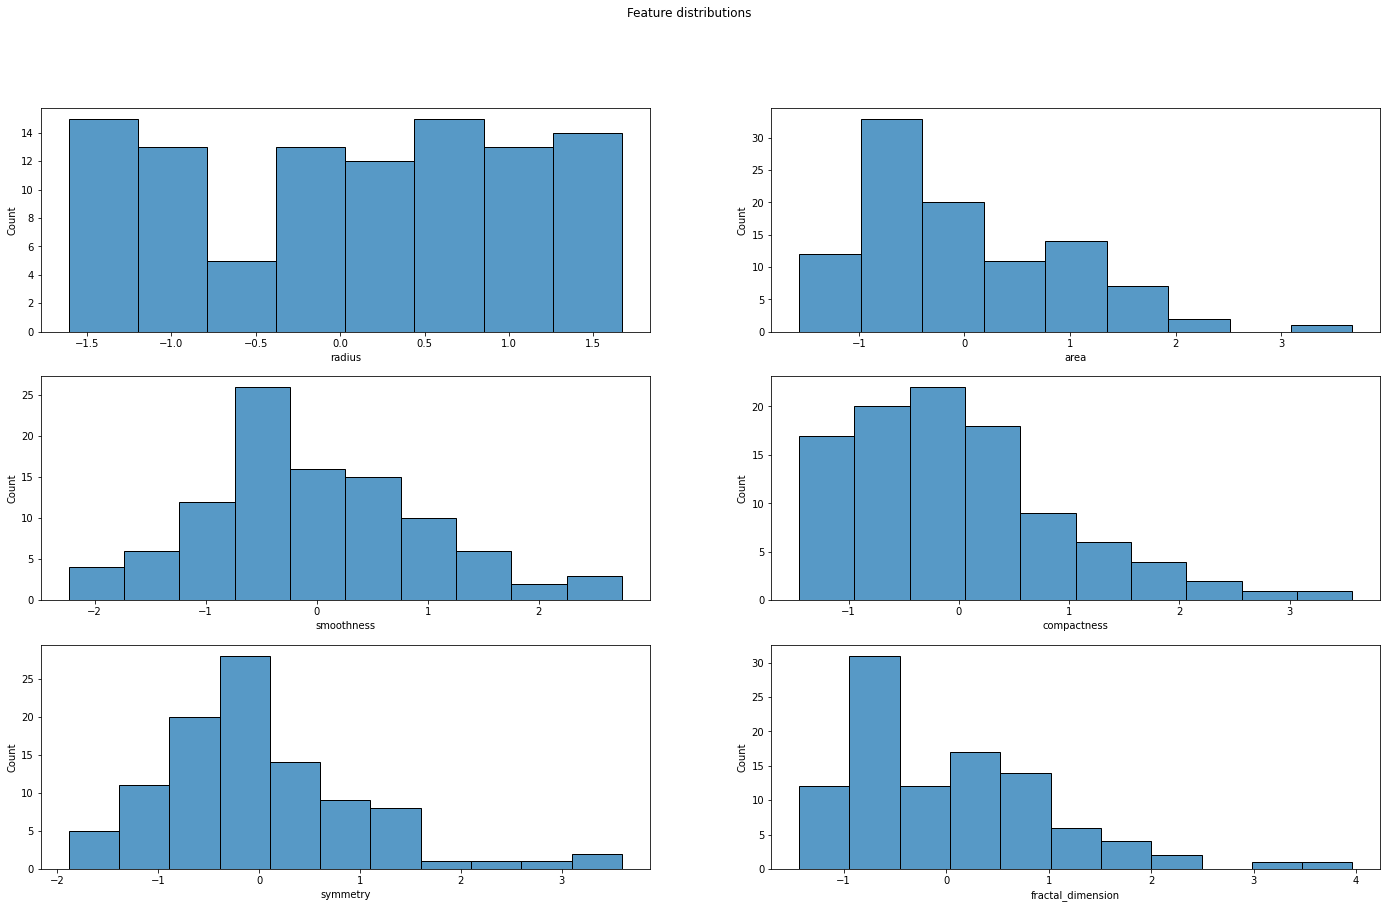

In [348]:
#create the columns distributions

fig, axes = plt.subplots(3,2, figsize=(24, 14))
fig.suptitle('Feature distributions')

axes = axes.reshape(6,)

for i,column in enumerate(cancer_norm.columns[:-1]):
    sns.histplot(ax = axes[i],data = cancer_norm, x= column)

In [349]:
#create the violin plot

def violin(df):
    plt.figure(figsize=(12,9))
    sns.violinplot(x='variable',y='value',hue='diagnosis_result',data=df,split=True, inner='quart')
    plt.xticks(rotation=20)
    plt.title('Diagnosis by features')
    return plt.show()

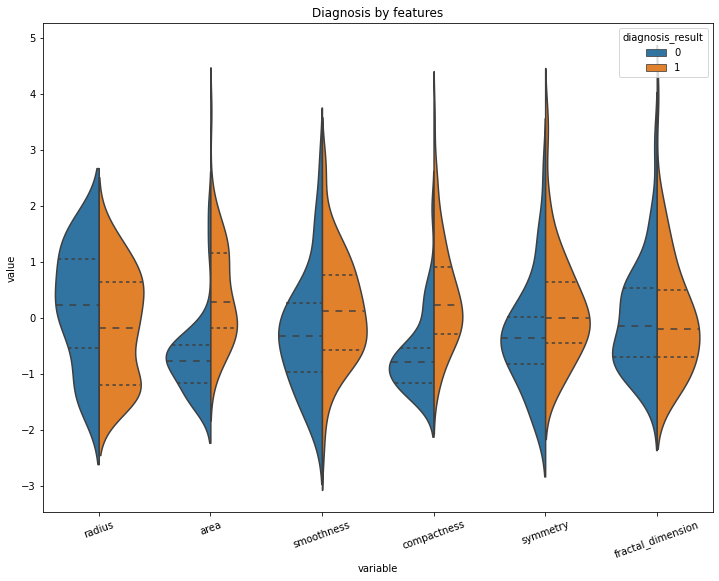

In [350]:
melting = cancer_norm.melt(id_vars='diagnosis_result', value_vars=cancer_norm.columns[:-1])
violin(melting)

We can see similarity between area and compactness on violin plot, which demonstrate strong relations to benign and malignant. Also smoothness and symmtry are resemble each other. 

Fractal dimension doesn't have a strong correlation with diagnosis and is form is too 'right' to influence the result. Drop them.

In [351]:
cancer.drop('fractal_dimension', axis=1, inplace=True)
cancer_norm.drop('fractal_dimension', axis=1, inplace=True)

## Model Selection

We will use different types of modelling. For this dataset we chose Decision Tree, Logistic Regression, Random Forest и XGBoost.

### Imported

In [352]:
import xgboost
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict

### Preparing work for the model

Create the variables for features and target values. Make a split the data on test and train by named function from scikit-learn. We use two parameter for this:

* test_size = 0.25
* random_state = 5

In [353]:
target = 'diagnosis_result'
features = cancer.columns.to_list()
features.pop(0)

'diagnosis_result'

In [354]:
X_train, X_test, Y_train, Y_test = train_test_split(cancer_norm[features], cancer_norm[target], test_size=0.25, random_state=44)

Next using different algorithms to find the best algorithm for this dataset.

In [355]:
metrics = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall'])

### Decision Tree

Let's start with decision tree and explain all the procedures which we will apply on this and the next models.

In [356]:
#call the model

dt = DecisionTreeClassifier()

#train the model

dt.fit(X_train, Y_train)

#predict results

dt_predictions = dt.predict(X_test)

#calculate accuracy

print("accuracy is: ", accuracy_score(Y_test, dt_predictions))
metrics = metrics.append({"Model": "Decision  Tree", "Accuracy": accuracy_score(Y_test, dt_predictions), "Precision":precision_score(Y_test, dt_predictions), "Recall":recall_score(Y_test, dt_predictions)}, ignore_index=True)

accuracy is:  0.88


### Random Forest

In [357]:
rf = RandomForestClassifier(n_estimators = 100, random_state=32)
rf.fit(X_train,Y_train)
rf_predictions = rf.predict(X_test)
print("accuracy is: ", accuracy_score(Y_test, rf_predictions))
metrics = metrics.append({"Model": "Random Forest", "Accuracy": accuracy_score(Y_test, rf_predictions), "Precision":precision_score(Y_test, rf_predictions), "Recall":recall_score(Y_test, rf_predictions)}, ignore_index=True)

accuracy is:  0.96


### Logistic Regression

In [358]:
lor = LogisticRegression()
lor.fit(X_train, Y_train)
lor_predictions = lor.predict(X_test)
print("accuracy is: ", round(accuracy_score(Y_test, lor_predictions),3))
metrics = metrics.append({"Model": "Logistic Regression", "Accuracy": accuracy_score(Y_test, lor_predictions), "Precision":precision_score(Y_test, lor_predictions), "Recall":recall_score(Y_test, lor_predictions)}, ignore_index=True)

accuracy is:  0.88


### Naive Bayes Classificator

In [359]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, Y_train)
nb_predictions = nb.predict(X_test)
print("accuracy is: ", round(accuracy_score(Y_test, nb_predictions),3))
metrics = metrics.append({"Model": "Naive Bayes", "Accuracy": accuracy_score(Y_test, nb_predictions), "Precision":precision_score(Y_test, nb_predictions), "Recall":recall_score(Y_test, nb_predictions)}, ignore_index=True)

accuracy is:  0.68


### XG Boost

In [360]:
xgb = xgboost.XGBClassifier(objective ='binary:logistic', max_depth = 5, alpha = 3, use_label_encoder=False)
xgb.fit(X_train, Y_train)
xgb_predictions = xgb.predict(X_test)
print("accuracy is: ", round(accuracy_score(Y_test, xgb_predictions),3))
metrics = metrics.append({"Model": "XG Boost", "Accuracy": accuracy_score(Y_test, xgb_predictions), "Precision":precision_score(Y_test, xgb_predictions), "Recall":recall_score(Y_test, xgb_predictions)}, ignore_index=True)

[22:43:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy is:  0.92


We use the three most common metrics for the behavior of the model and the assessment of its applicability.

* Accuracy is an indicator that describes the overall accuracy of the model prediction across all classes.
* Precision measures the accuracy of the model when defining the Positive class.
* Recall shows how much of the positive objects were highlighted by the model.

In [361]:
from sklearn.metrics import classification_report

report_dt = classification_report(Y_test, dt_predictions)
report_rf = classification_report(Y_test, rf_predictions)
report_lor = classification_report(Y_test, lor_predictions)
report_nb = classification_report(Y_test, nb_predictions)
report_xgb = classification_report(Y_test, xgb_predictions)

print("Logistic Regression: \n", report_lor)
print("Forest Classifier: \n", report_rf)
print("Decision Tree: \n", report_dt)
print("Naive Bayes: \n", report_nb)
print("XGBoost: \n", report_xgb)

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.92      0.86      0.89        14

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25

Forest Classifier: 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.93      1.00      0.97        14

    accuracy                           0.96        25
   macro avg       0.97      0.95      0.96        25
weighted avg       0.96      0.96      0.96        25

Decision Tree: 
               precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.87      0.93      0.90        14

    accuracy                           0.88        25
   macro avg       0.88      0.87      0.88        25
weighted avg 

In [362]:
metrics[['Precision', 'Recall']] = metrics[['Precision', 'Recall']].apply(lambda x: round(x, 2))
metrics

,Model,Accuracy,Precision,Recall
0,Decision Tree,0.88,0.87,0.93
1,Random Forest,0.96,0.93,1.00
2,Logistic Regression,0.88,0.92,0.86
3,Naive Bayes,0.68,0.75,0.64
4,XG Boost,0.92,0.88,1.00


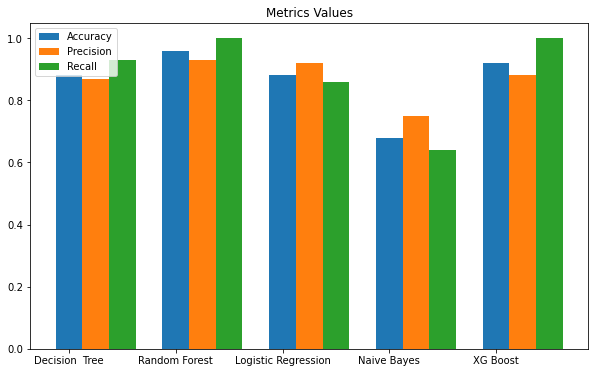

In [366]:
x_axis = np.arange(len(metrics))
plt.figure(figsize = (10,6))
plt.bar(x_axis, metrics.Accuracy, width=0.25)
plt.bar(x_axis +0.25, metrics.Precision, width=0.25)
plt.bar(x_axis +0.5, metrics.Recall, width=0.25)
plt.xticks(x_axis, metrics.Model)
plt.legend(metrics[['Accuracy', 'Precision', 'Recall']])
plt.title('Metrics Values')
plt.show()

## Conclusion

Our model is best defined by the ***Random Forest*** approach. We can see different metrics - Random Forest show the best result by all of them. If you focus on Recall, ***XGBoost*** shows an excellent result.

The main problem is the lack of authoritative data sources, as well as the modest composition of the dataset, which contains only 100 records. The big plus was the readiness of the data for direct action.